In [4]:
import networkx as nx
from dowhy import CausalModel
import pandas as pd
import drawio
import sys

In [ ]:
# Build your graph_dict
graph_dict = {
    "Satisfaction": {"Y"},
    "Health": {"Education", "Employment", "Satisfaction", "Y"},
    "Living Environment": {"Satisfaction", "Y"},
    "Employment": {"Satisfaction", "Living Environment", "T"},
    "Education": {"Satisfaction", "Employment"},
    "Demographics": {
        "Satisfaction",
        "Health",
        "Living Environment",
        "Employment",
        "Education",
        "T",
        "Y",
    },
    "T": {"Y", "Living Environment", "Satisfaction"},
    "Y": set(),
}

all_nodes = set(graph_dict.keys())

# Build NetworkX DiGraph
G = nx.DiGraph()
for src, targets in graph_dict.items():
    for tgt in targets:
        G.add_edge(src, tgt)

# Create dummy data with correct column names
df = pd.DataFrame(columns=G.nodes)

# Convert to DOT string using pydot
dot_str = nx.nx_pydot.to_pydot(G).to_string()

# Feed into DoWhy
model = CausalModel(data=df, treatment="T", outcome="Y", graph=dot_str)

# Identify effect
identified_estimand = model.identify_effect()

# Print the result
print("Minimal backdoor adjustment set:", identified_estimand.backdoor_variables)

Minimal backdoor adjustment set: {'backdoor1': ['Employment', 'Demographics', 'Education', 'Health'], 'backdoor2': ['Employment', 'Demographics'], 'backdoor': ['Employment', 'Demographics']}


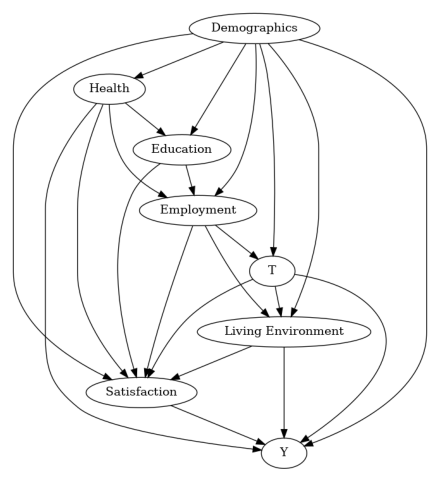

In [6]:
# Visualize the graph
model.view_model(layout="dot", file_name="../figs/causal_model")

In [ ]:
drawio.write(G, sys.stdout)

# identity: nodeid
# label: %label%
# style: %style%
# link: url
# width: @width
# height: @height
# layout: verticalflow
# ignore: nodeid,style,height,width,ref_0_0,ref_1_0,ref_2_0,ref_3_0,ref_4_0,ref_5_0,ref_6_0,label_0,label_1,label_2,label_3,label_4,label_5,label_6
# connect: {"from": "ref_0_0", "to": "nodeid", "fromlabel": "label_0", "style": "-"}
# connect: {"from": "ref_1_0", "to": "nodeid", "fromlabel": "label_1", "style": "-"}
# connect: {"from": "ref_2_0", "to": "nodeid", "fromlabel": "label_2", "style": "-"}
# connect: {"from": "ref_3_0", "to": "nodeid", "fromlabel": "label_3", "style": "-"}
# connect: {"from": "ref_4_0", "to": "nodeid", "fromlabel": "label_4", "style": "-"}
# connect: {"from": "ref_5_0", "to": "nodeid", "fromlabel": "label_5", "style": "-"}
# connect: {"from": "ref_6_0", "to": "nodeid", "fromlabel": "label_6", "style": "-"}
nodeid,label,tags,style,width,height,link,ref_0_0,ref_1_0,ref_2_0,ref_3_0,ref_4_0,ref_5_0,ref_6_0,label_0,label_1,label_2,label_3,label

In [13]:
print("Backdoor variables:", identified_estimand.backdoor_variables['backdoor'])
print("Instrumental variables:", identified_estimand.instrumental_variables)
print("Frontdoor variables:", identified_estimand.frontdoor_variables)

Backdoor variables: ['Employment', 'Demographics']
Instrumental variables: []
Frontdoor variables: []
